# Project 1: fys-stk4155
## Part a) 
### (Kode fra oppgaveteksten)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

In [2]:
# Need to make sure this works when y, y_hat and y_tilde are matrices.

# Creating a R2-square fuction:
def R2(y, y_predict):
    C = y-y_predict
    val = sum(sum((y-y_predict))**2)/sum(sum((y-np.mean(y))**2))
    return 1 - val

# Creating a mean square error function:
def MSE(y, y_predict):
    C = y-y_predict
    [n, m] = C.shape
    return sum(sum((C)**2))/(n*m)


def generateDesignmatrix(p, x, y): 
    m = int((p**2+3*p+2)/2) # returnerer heltall for p = [1:5]
    X = np.zeros((len(x), m))
    X[:,0] = 1
    counter = 1
    for i in range(1, p+1):
        for j in range(i+1):
            X[:,counter] = x**(i-j) * y**j
            counter+=1
    return X

In [3]:
def franke_function(x, y):
    term1 = 0.75 * np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75 * np.exp(-((9*x+1)**2) / 49.0 - 0.1*(9*y+1))
    term3 = 0.5 * np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2 * np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

(20, 20)


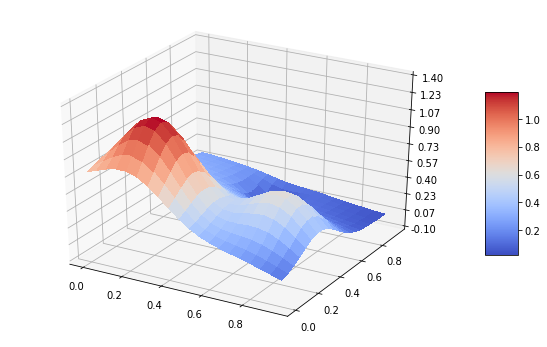

In [4]:
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

z = franke_function(x, y)
print(z.shape)
# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [5]:
# Initializing X-matrix for fitting a polynomial of degree p 

np.random.seed(1000)
x = np.random.rand(20, )
y = np.random.rand(20, )
x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 2 # [1:5]

x = np.random.rand(20, )
y = np.random.rand(20, ) 
  
X = generateDesignmatrix(p,x,y)

z.shape

(20, 20)

In [6]:
"""
fig = plt.figure(figsize = (10,6))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()"""


"\nfig = plt.figure(figsize = (10,6))\nax = fig.gca(projection='3d')\n\n# Plot the surface.\nsurf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,\n                       linewidth=0, antialiased=False)\n\n# Customize the z axis.\nax.set_zlim(-0.10, 1.40)\nax.zaxis.set_major_locator(LinearLocator(10))\nax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))\n\n# Add a color bar which maps values to colors.\nfig.colorbar(surf, shrink=0.5, aspect=5)\n\nplt.show()"

# Test



In [7]:
import numpy as np
import algorithms
from model_selection import GridSearch #use Gridsearch.fit(x,y)
from model_comparison import model_comparison

In [8]:
np.random.seed(1000)
x = np.random.rand(1000, )
y = np.random.rand(1000, )
#x, y = np.meshgrid(x,y)
z = franke_function(x, y)

p = 2 # [1:5]

X = generateDesignmatrix(p,x,y)

In [9]:
z.shape

(1000,)

In [10]:
# Experimental setup
models = {
    'ridge': algorithms.Ridge, 
    "ols": algorithms.OLS, 
    "lasso": algorithms.Lasso
}
param_grid = {
    'ridge': [0.01, 0.1, 1.0, 10.0], 
    'ols': [0], 
    'lasso': [0.01, 0.1, 1.0, 10.0]
}

# Perform experiment and collect results.
#
# split_size: Dividing into 20 % test data and 80 % train data.
# 
# TODO: Add scoring kwargs ('mse', 'r2')
results = model_comparison(
    models, param_grid, X, z, split_size=0.2
)

Testing model: ridge
[0.4123356238348189]
[0.4071999886726692]
[0.4103759866574683]
[0.40762490995948214]
Best average train score (mse): 0.00040066453684642177
Best average train score (r2): 0.00040066453684642177
Best average test score (mse): 0.2529103347847467
Best average test score (r2): -1.9727667251811267
Testing model: ols
[0.40971334943886295]
[0.4065084425969657]
[0.4083497824667227]
[0.40732844303162324]
Best average train score (mse): 0.3645442366714556
Best average train score (r2): 0.3645442366714556
Best average test score (mse): 0.10105383032813987
Best average test score (r2): -0.1256364665654619
Testing model: lasso
[0.40772947371514645]
[0.4042851251061832]
[0.40696247643212974]
[0.407166447708859]
Best average train score (mse): 0.4077294737151465
Best average train score (r2): 0.4077294737151465
Best average test score (mse): 0.07385225639428854
Best average test score (r2): 0.16308452061943934


In [11]:
results

{'ridge': {'avg_train_scores_mse': [0.00040020811944487997,
   0.00039955427247294887,
   0.00040066453684642177,
   0.00039617933766626005],
  'avg_test_scores_mse': [0.23410744646987885,
   0.24429040564215454,
   0.24666079061177243,
   0.2529103347847467],
  'avg_train_scores_r2': [0.00040020811944487997,
   0.00039955427247294887,
   0.00040066453684642177,
   0.00039617933766626005],
  'avg_test_scores_r2': [-1.9727667251811267,
   -2.1052329269387733,
   -2.1160588177726884,
   -2.078324978382961]},
 'ols': {'avg_train_scores_mse': [0.3645442366714556,
   0.3605775198759862,
   0.36236364115069414,
   0.36018687235484065],
  'avg_test_scores_mse': [0.09037092885405132,
   0.09021811012457227,
   0.1002294378911714,
   0.10105383032813987],
  'avg_train_scores_r2': [0.3645442366714556,
   0.3605775198759862,
   0.36236364115069414,
   0.36018687235484065],
  'avg_test_scores_r2': [-0.1256364665654619,
   -0.1790522071933165,
   -0.21238070418488064,
   -0.16990754085772042]},
 'l

In [12]:
# Plotting:
# for each model (subplots?) plot training scores vs test scores
# train scores >> test scores => overfitting
# low train scores => biased: coudl mean bad data or too much regularization 
# Validation curve (must include np.std(predicted scores))